### Understanding Linear Regression
- Linear Regression is a statistical model used to predict the relationship between independent and dependent variable

- Examine based on 2 factors

    1. Which variables in particular are significant predictors of the outcome variables?

    2. How significant is the regression line to make predictions with highest possible accuracy

### Regression Equation
- The simplest form of a simple linear regression equation with one dependent and one independent variable is represented by:
$$y= mx + c$$                        
                        
  $y--->Dependent\;Variable$  
  
  $x---> Independent\;Variable$
  
  $m---> Slope\;of\;a\;line$
  
  $$m = \frac{y2-y1}  {x2-x1}$$
  
  $c---> Co-Efficient of a Line$

### Intuition behind the Regression line

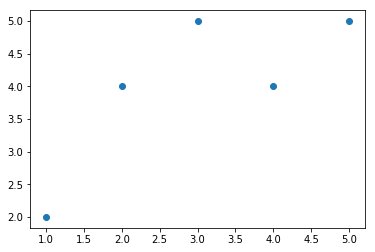

In [7]:
import matplotlib.pyplot as plt
X = [1,2,3,4,5] #Independent Variable
Y = [2,4,5,4,5] #Dependent Variable
plt.scatter(X,Y)
plt.show()

In [8]:
import numpy as np
# Finding mean of X & Y
# Mean of X = (1+2+3+4+5)/5 = 3
# Mean of Y = (2+4+5+4+5)/5 = 4
print("Mean of X:",np.mean(X))
print("Mean of Y:",np.mean(Y))
#(3,4) is the regression line 

Mean of X: 3.0
Mean of Y: 4.0


$$ m = \frac {(n * \sum{XY}) -(\sum{X}*\sum{Y})}  {(n * \sum{X^2}) - ( \sum{X^2})} =\frac{(5*66)-(15*20)} {(5*55)-(225} = 0.6 $$

$$ c = \frac{(\sum{Y}*{X^2})-(\sum{X}*\sum{XY})} {(n * \sum{X^2}) - ( \sum{X^2})} = 2.2 $$

$$ y = m*X+c $$

$$   = 0.6*3 +2.2 = 4$$

$$ Y_Pred $$

$$Y = 0.6(1)+2.2=2.8$$
$$Y = 0.6()+2.2=3.4$$
$$Y = 0.6(3)+2.2=4$$
$$Y = 0.6(4)+2.2=4.6$$
$$Y = 0.6(5)+2.2=5.2$$

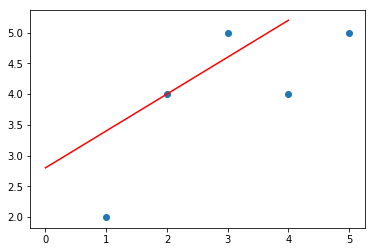

In [24]:
y_pred=[2.8,3.4,4,4.6,5.2]
plt.scatter(X,Y)
plt.plot(y_pred,c="r")
plt.show()

Here Blue-points represent the actual Y Values and Red points represent the Predicted Y Values. The distance between the actual and predicted values are known as *RESIDUALS or ERRORS*.The best fit line should have the least sum of squares of these errors also known as e-square

In [ ]:
Reg={
    "X":['1','2','3','4','5'],
    'Y':['2','4','5','4','5',],
    'Y_Pred':['2.8','3.4','4','4.6','5.2'],
    '(Y-Y_Pred)':['-0.8','0.6','1','-0.6','-0.2'],
    '(Y-Y_Pred)^2':['0.64','0.36','1','0.36','0.04']
}
data=pd.DataFrame(Reg)
data


$$ \sum(Y-Y_Pred)^2=2.4 $$

The sum of squared errors for this regression line is 2.4.We check this error for each line and conclude the best fit line having the least square value

## Finding the best fit line
- Minimizing the Distance:
There are lots of ways to minimize distance between the line and the data points like *Sum of Squared errors,Sum of Absolute errors,RMS error* etc

## Multiple Linear Regression

1. Simple linear Regression 

$$ Y = MX + C $$

2. Multiple linear Regression

$$ Y = M_1X_1 + M_2X_2 + M_3X_3 + ..... + M_nX_n + C   $$


## Implementation of Linear Regresssion 
### Example: Profit Estimation of a company
#####  Which companies shall i invest?
 ###### Idea 
- Decide compaines to invest
- Predict the profit companies make
- Based on companies expenses
##### For simpliciity, lets consider a single variable(R&D) and find out which companies to invest in
- Companies spending more on R&D makes good profit,lets invest in them

In [ ]:
#Importing Libraries
import pandas as pd # Manipulating data
import numpy as np  #Number Python for numericals
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Visualization
%matplotlib inline #To see graph when it comes up

In [ ]:
#Reading data
url=("C:\\Users\\abhishek\\Downloads\\Edureka\\Datasets\\headbrain.csv")
data=pd.read_csv(url)
print(data.shape)
data.head()

In [ ]:
#Collecting X and Y
X = data["Head Size(cm^3)"].values
Y = data["Brain Weight(grams)"].values

# Implementing by Formula

In [ ]:
# Mean X & Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
n = len(X)

#Using the formula to calculate b1 & b0
numer = 0
denom = 0 
for i in range(n):
    numer+= (X[i] - mean_x) * (Y[i] - mean_x)
    denom+= (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

#Printing Co-Efficients
print(b1,b0)

# Y=MX + C
# M=b1 C=b0

In [ ]:
#Plotting values and Regression line

max_X = np.max(X) + 100
min_X = np.min(X) + 100

#Calculating line values X and Y
x=np.linspace(min_X, max_X,1000)
y=b0+b1*x

#Plotting line
plt.plot(x,y,color="red",label="Regression Line")
#Plotting scatter points
plt.scatter(X,Y,color='black',label="Scatter plot")

plt.xlabel("Head size in cm^3")
plt.ylabel("Brain Weight in grams")
plt.legend()
plt.show()

In [ ]:
ss_t = 0  #Total sum of square
ss_r = 0  #Total sum of square residual
for i in range(n):
    y_pred = b0 + b1 *X[i]
    ss_t+= (Y[i] - mean_y) **2
    ss_r+= (Y[i] - y_pred) **2
r2 = 1-(ss_r/ss_t)
print(r2)


# Implementing Using SciKit Learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Cannot use Rank 1 matrix in sckikit learn
X= X.reshape((n,1))

#Creating model
model = LinearRegression()

#Fitting training data
model = model.fit(X,Y)

#Y prediction
Y_pred =model.predict(X)

#Calculating RMSE and R2 score
mse = mean_squared_error(Y,Y_pred)
rmse = np.sqrt(mse)
r2_score =model.score(X,Y)

print(np.sqrt(mse))
print(r2_score)

